In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df.head(30)
df.drop(columns = ["img"])

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT,2013.0
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014.0
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT,2002.0
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT,2013.0
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.0,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28,2016.0
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09,2020.0
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.0,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09,2020.0
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.0,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24,2019.0


In [93]:
df = pd.read_csv('vgchartz-2024.csv')

In [94]:
# Verificando valores ausentes
missing_values = df.isnull().sum()

# Converting release_date and last_update to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Resumo após as conversões
data_info_post_conversion = df.info()

missing_values, data_info_post_conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   title         64016 non-null  object        
 2   console       64016 non-null  object        
 3   genre         64016 non-null  object        
 4   publisher     64016 non-null  object        
 5   developer     63999 non-null  object        
 6   critic_score  6678 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 6.8+ MB


(img                 0
 title               0
 console             0
 genre               0
 publisher           0
 developer          17
 critic_score    57338
 total_sales     45094
 na_sales        51379
 jp_sales        57290
 pal_sales       51192
 other_sales     48888
 release_date     7051
 last_update     46137
 dtype: int64,
 None)

In [95]:
# Tratando das colunas que contem NA e as deixando com valores 0
sales_columns = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',"critic_score"]
df[sales_columns] = df[sales_columns].fillna(0)

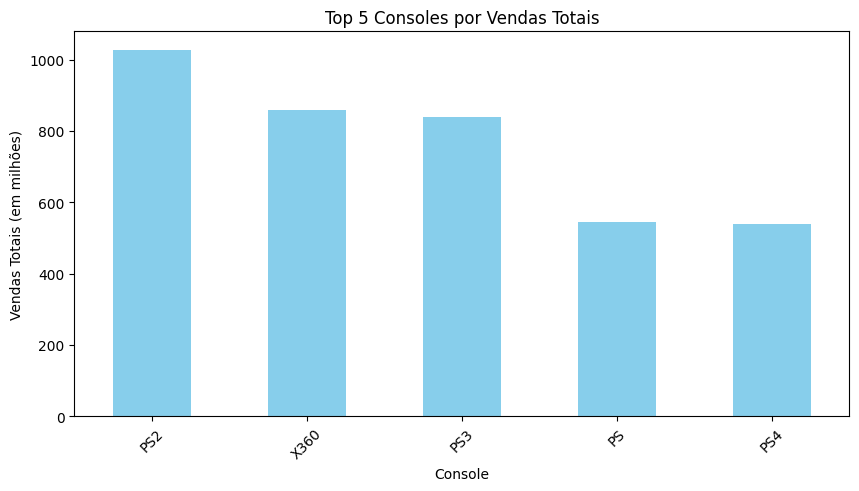

In [96]:
# Agrupar os dados por console e somar as vendas totais
console_sales = df.groupby('console')['total_sales'].sum().sort_values(ascending=False)

# Selecionar os 5 consoles com maior total de vendas
top_5_consoles = console_sales.head(5)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 5))
top_5_consoles.plot(kind='bar', color='skyblue')
plt.title('Top 5 Consoles por Vendas Totais')
plt.xlabel('Console')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)
plt.show()


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


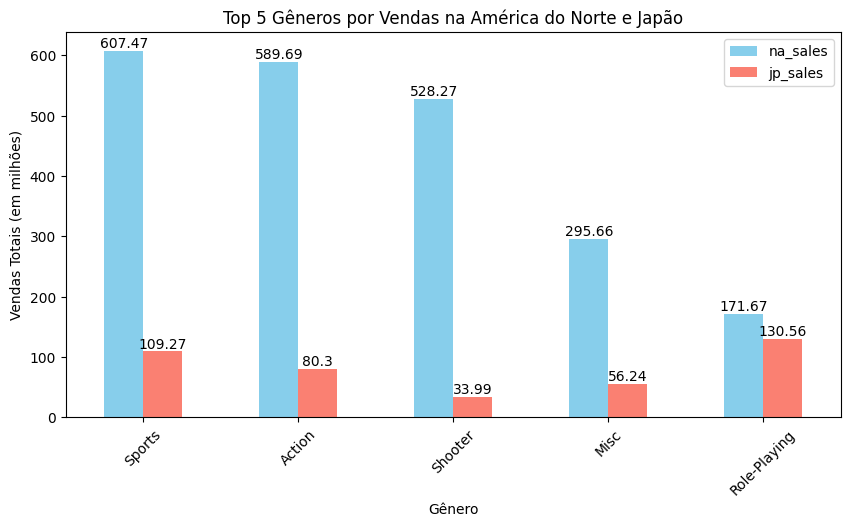

In [109]:
# Agrupar os dados por 'genre' e somar
sales_genre = df.groupby(['genre'])[['na_sales', 'jp_sales']].sum()

# Selecionar os 5 gêneros com maior total de vendas na região
sales_genre['total_sales'] = sales_genre['na_sales'] + sales_genre['jp_sales']
top_5_genres = sales_genre.sort_values(by='total_sales', ascending=False).head(5)

# Plotar o gráfico de barras
top_5_genres = top_5_genres[['na_sales', 'jp_sales']]  # Selecionar apenas as colunas de vendas para o gráfico
ax = top_5_genres.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.title('Top 5 Gêneros por Vendas na América do Norte e Japão')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

# Adicionar números em cima das barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()




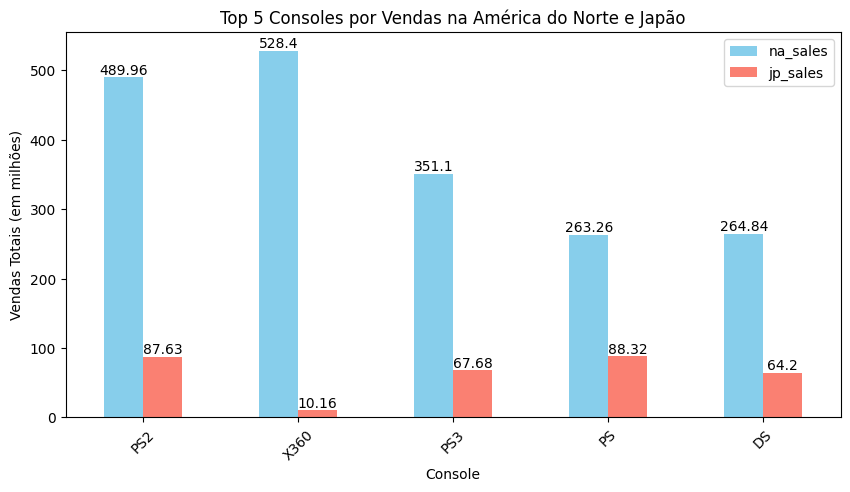

In [112]:
# Agrupar os dados por 'console' e somar
sales_region = df.groupby(['console'])[['na_sales', 'jp_sales']].sum()

# Selecionar os 5 consoles com maior total de vendas na região
sales_region['total_sales'] = sales_region['na_sales'] + sales_region['jp_sales']
sales_country = sales_region.sort_values(by='total_sales', ascending=False).head(5)

# Plotar o gráfico de barras
sales_country = sales_country[['na_sales', 'jp_sales']]  # Selecionar apenas as colunas de vendas para o gráfico
ax = sales_country.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.title('Top 5 Consoles por Vendas na América do Norte e Japão')
plt.xlabel('Console')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

# Adicionar números em cima das barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


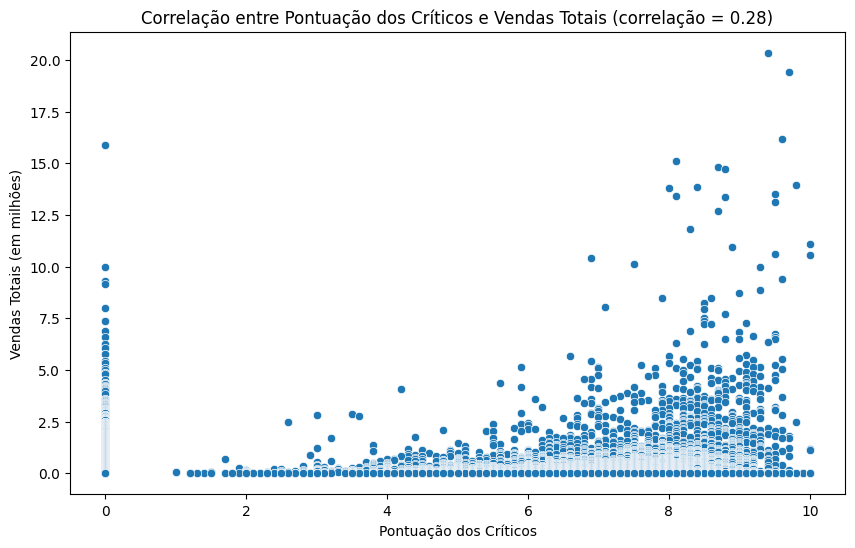

In [119]:
# Remover linhas onde critic_score é NaN
df = df.dropna(subset=['critic_score'])

# Calcular a correlação
correlation = df['critic_score'].corr(df['total_sales'])

# Plotar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df)
plt.title(f'Correlação entre Pontuação dos Críticos e Vendas Totais (correlação = {correlation:.2f})')
plt.xlabel('Pontuação dos Críticos')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()


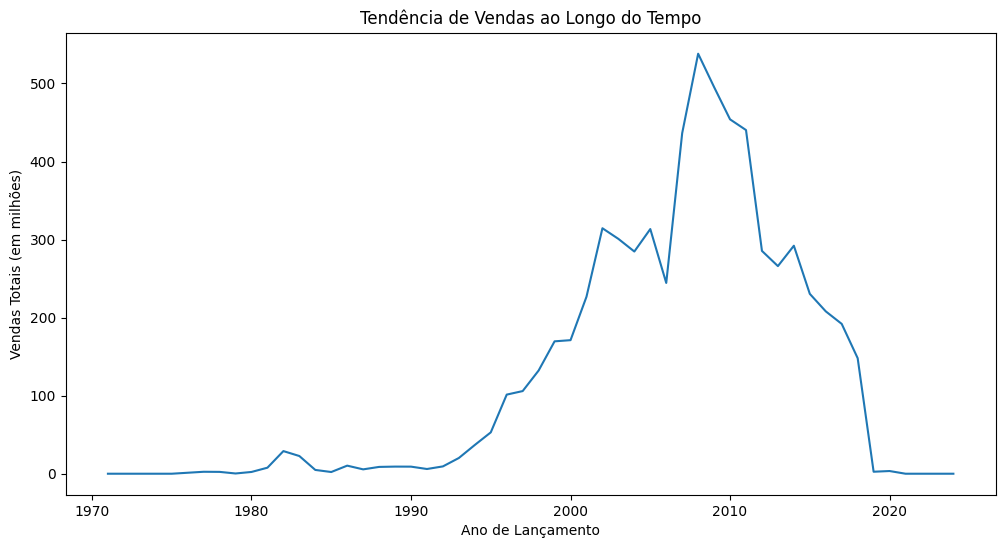

In [120]:
# Converter release_date para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extrair o ano de lançamento
df['release_year'] = df['release_date'].dt.year

# Agrupar por ano de lançamento e somar as vendas
sales_by_year = df.groupby('release_year')['total_sales'].sum()

# Plotar a tendência ao longo do tempo
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line')
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()


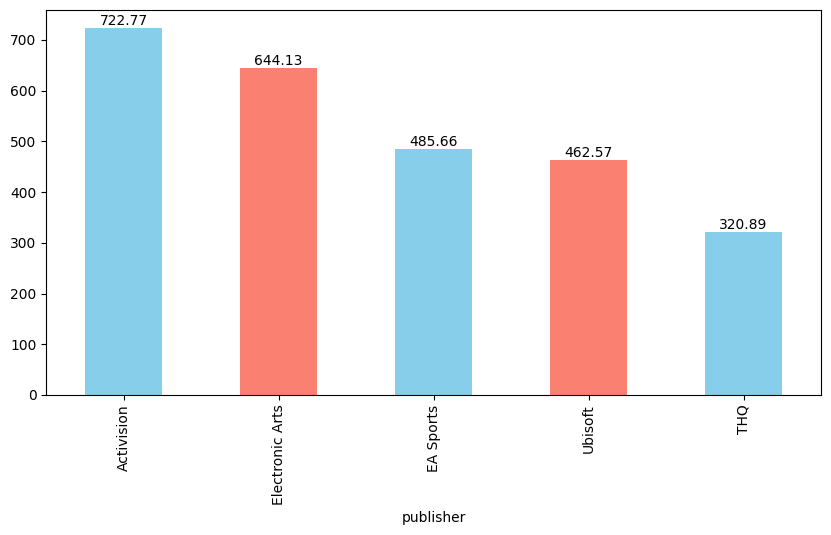

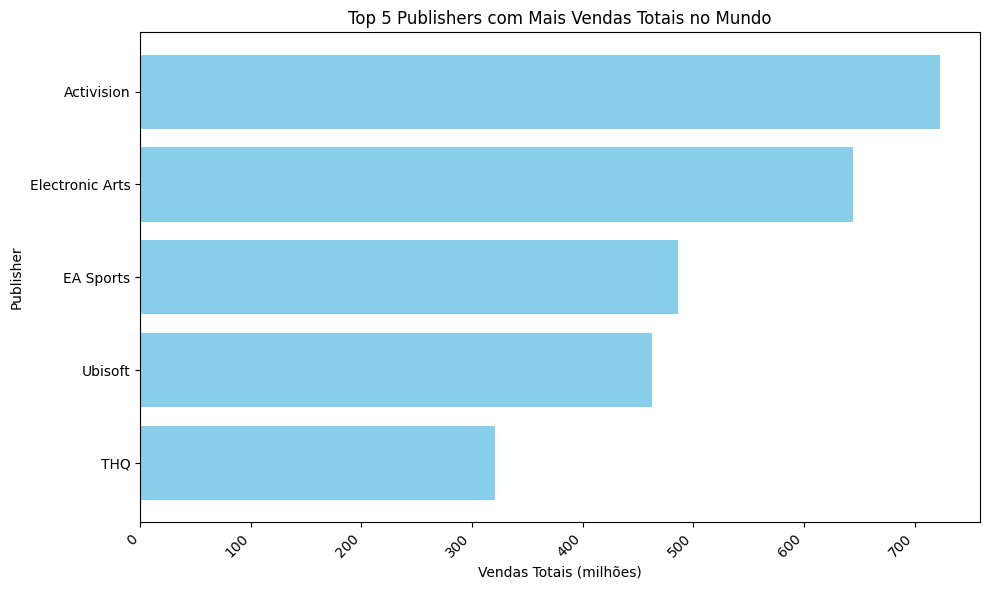

In [168]:
# Remover linhas com valores ausentes na coluna 'total_sales'
df = df.dropna(subset=['total_sales'])

# Agrupar por publisher e somar as vendas totais
publisher_sales = df.groupby('publisher')['total_sales'].sum()

# Ordenar os publishers por vendas totais em ordem decrescente e selecionar os 5 principais
top_publishers = publisher_sales.sort_values(ascending=False).head(5)

# Criar o gráfico de barras
ax = top_publishers.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'])
plt.figure(figsize=(10, 6))
plt.barh(top_publishers.index, top_publishers.values, color='skyblue')
plt.xlabel('Vendas Totais (milhões)')
plt.ylabel('Publisher')
plt.title('Top 5 Publishers com Mais Vendas Totais no Mundo')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o publisher com mais vendas apareça no topo
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

# Adicionar números em cima das barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


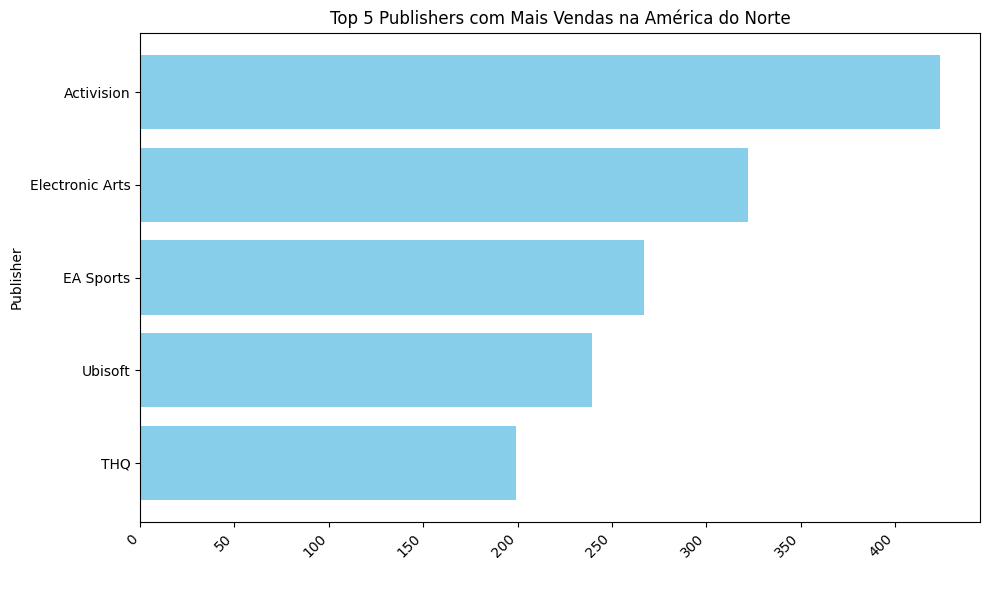

In [172]:
# Remover linhas com valores ausentes nas colunas de interesse
df = df.dropna(subset=['na_sales'])

# Função para criar gráfico de barras
def plot_top_publishers(sales_data, title, xlabel):
    top_publishers = sales_data.sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    plt.barh(top_publishers.index, top_publishers.values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel('Publisher')
    plt.title(title)
    plt.gca().invert_yaxis()  # Inverter o eixo y para que o publisher com mais vendas apareça no topo
    plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
    plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    plt.show()

# Agrupar por publisher e somar as vendas na América do Norte
na_sales_by_publisher = df.groupby('publisher')['na_sales'].sum()

# Criar gráficos para as vendas na América do Norte e no Japão
plot_top_publishers(na_sales_by_publisher, 'Top 5 Publishers com Mais Vendas na América do Norte', ' ')



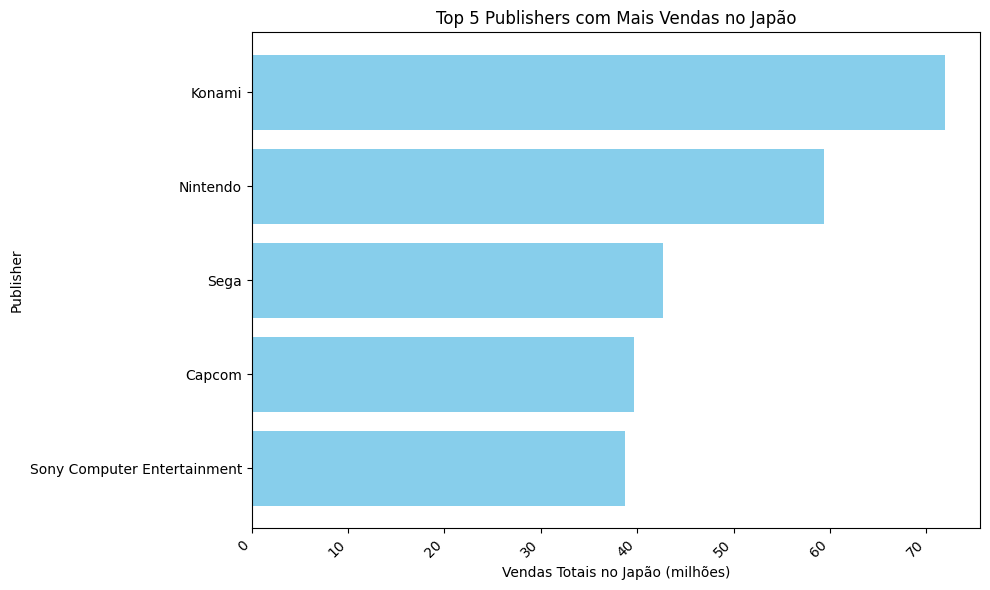

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df' é o DataFrame já carregado e limpo
# Remover linhas com valores ausentes nas colunas de interesse
df = df.dropna(subset=['jp_sales'])

# Função para criar gráfico de barras
def plot_top_publishers(sales_data, title, xlabel):
    top_publishers = sales_data.sort_values(ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    plt.barh(top_publishers.index, top_publishers.values, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel('Publisher')
    plt.title(title)
    plt.gca().invert_yaxis()  # Inverter o eixo y para que o publisher com mais vendas apareça no topo
    plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
    plt.tight_layout()  # Ajustar o layout para evitar sobreposição
    plt.show()

# Agrupar por publisher e somar as vendas no Japão
jp_sales_by_publisher = df.groupby('publisher')['jp_sales'].sum()

# Criar gráficos para as vendas na América do Norte e no Japão
plot_top_publishers(jp_sales_by_publisher, 'Top 5 Publishers com Mais Vendas no Japão', 'Vendas Totais no Japão (milhões)')


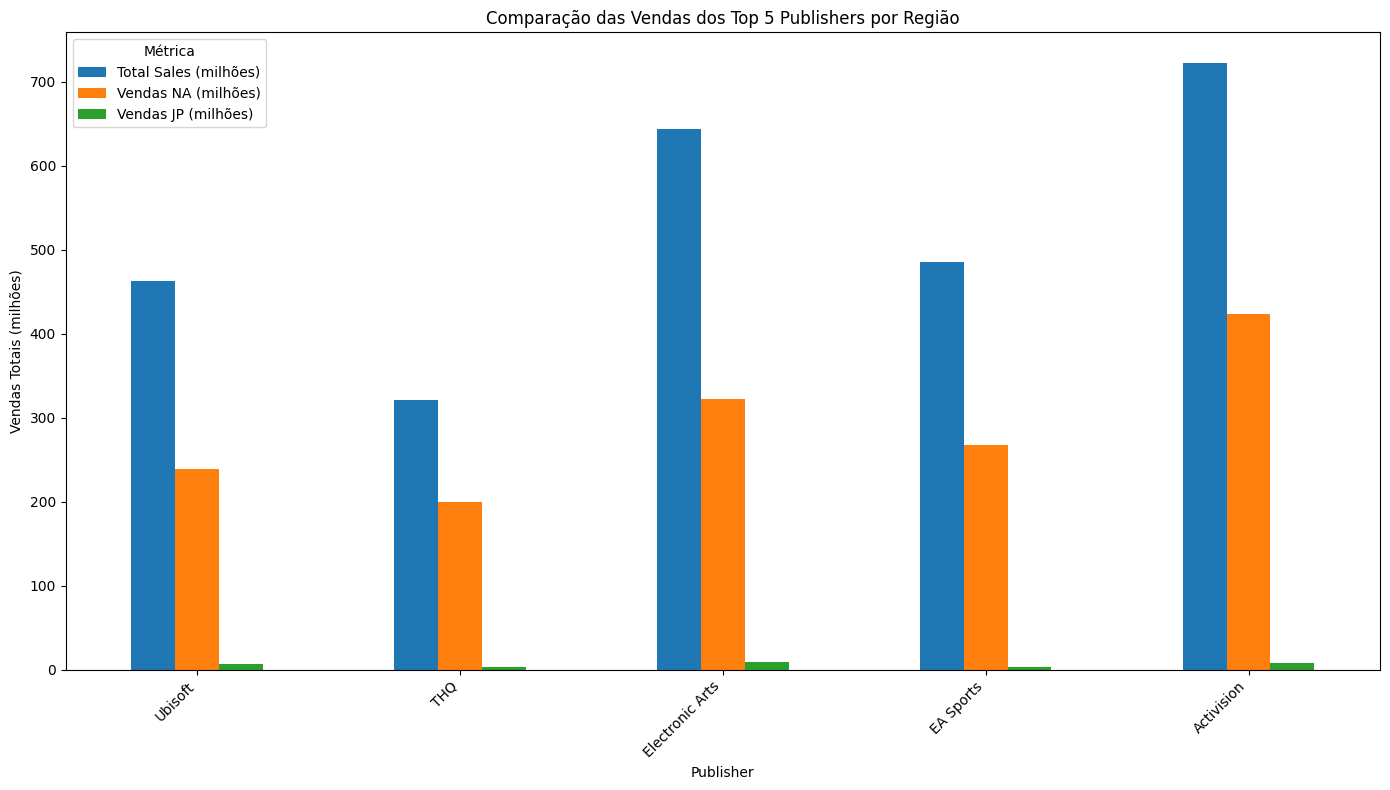

In [136]:
# Remover linhas com valores ausentes nas colunas de interesse
df = df.dropna(subset=['total_sales', 'na_sales', 'jp_sales'])

# Agrupar por publisher e somar as vendas totais
total_sales_by_publisher = df.groupby('publisher')['total_sales'].sum()
# Identificar os 5 principais publishers
top_5_publishers = total_sales_by_publisher.sort_values(ascending=False).head(5).index

# Filtrar o DataFrame para incluir apenas os top 5 publishers
df_top_5 = df[df['publisher'].isin(top_5_publishers)]

# Agrupar e somar as vendas na América do Norte e no Japão para os top 5 publishers
na_sales_top_5 = df_top_5.groupby('publisher')['na_sales'].sum()
jp_sales_top_5 = df_top_5.groupby('publisher')['jp_sales'].sum()

# Criar DataFrame para comparação
comparison_df = pd.DataFrame({
    'Total Sales (milhões)': total_sales_by_publisher[top_5_publishers],
    'Vendas NA (milhões)': na_sales_top_5,
    'Vendas JP (milhões)': jp_sales_top_5
}).sort_index(ascending=False)

# Criar o gráfico de barras para comparação
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar barras para cada região
comparison_df.plot(kind='bar', ax=ax)
plt.xlabel('Publisher')
plt.ylabel('Vendas Totais (milhões)')
plt.title('Comparação das Vendas dos Top 5 Publishers por Região')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

plt.legend(title='Métrica')
plt.show()


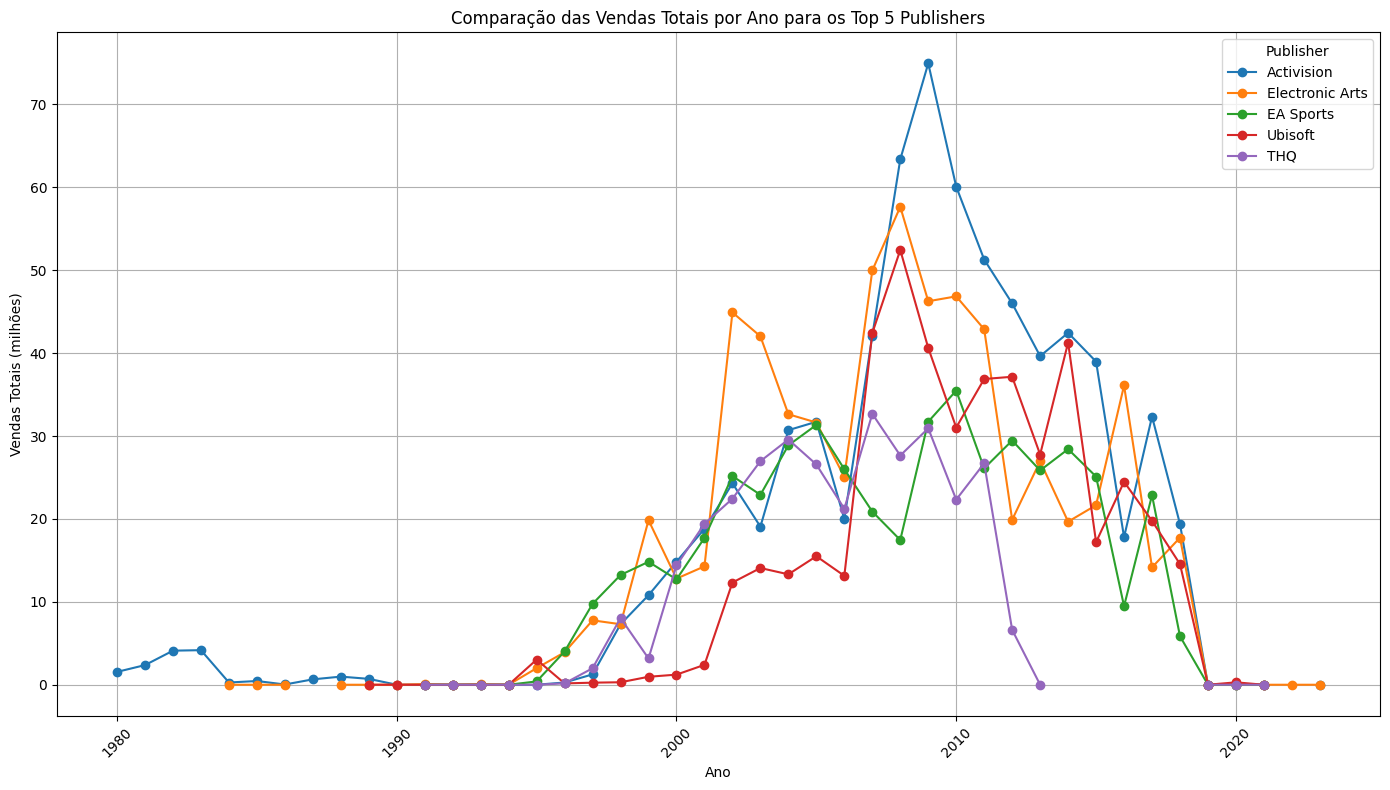

In [138]:


# Remover linhas com valores ausentes nas colunas de interesse
df = df.dropna(subset=['total_sales', 'release_year'])

# Agrupar por publisher e somar as vendas totais
total_sales_by_publisher = df.groupby('publisher')['total_sales'].sum()
# Identificar os 5 principais publishers
top_5_publishers = total_sales_by_publisher.sort_values(ascending=False).head(5).index

# Filtrar o DataFrame para incluir apenas os top 5 publishers
df_top_5 = df[df['publisher'].isin(top_5_publishers)]

# Agrupar por ano e publisher e somar as vendas
annual_sales_by_publisher = df_top_5.groupby(['release_year', 'publisher'])['total_sales'].sum().unstack()

# Criar o gráfico para comparação ao longo dos anos
plt.figure(figsize=(14, 8))

# Plotar cada publisher com uma linha diferente
for publisher in top_5_publishers:
    if publisher in annual_sales_by_publisher.columns:
        plt.plot(annual_sales_by_publisher.index, annual_sales_by_publisher[publisher], label=publisher, marker='o')

plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.title('Comparação das Vendas Totais por Ano para os Top 5 Publishers')
plt.legend(title='Publisher')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


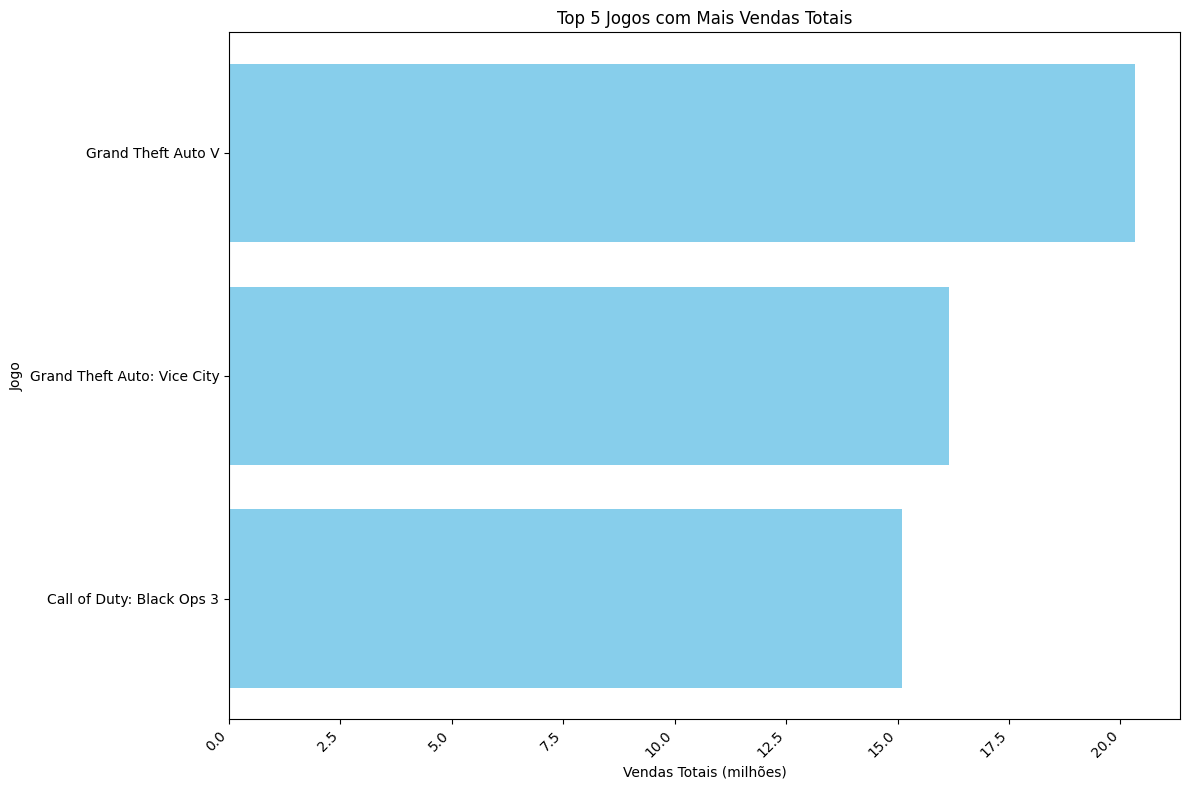

In [139]:
# Remover linhas com valores ausentes na coluna 'total_sales'
df = df.dropna(subset=['total_sales'])

# Selecionar os 5 jogos com maiores vendas
top_5_games = df[['title', 'total_sales']].sort_values(by='total_sales', ascending=False).head(5)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(top_5_games['title'], top_5_games['total_sales'], color='skyblue')
plt.xlabel('Vendas Totais (milhões)')
plt.ylabel('Jogo')
plt.title('Top 5 Jogos com Mais Vendas Totais')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o jogo com mais vendas apareça no topo
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

plt.show()


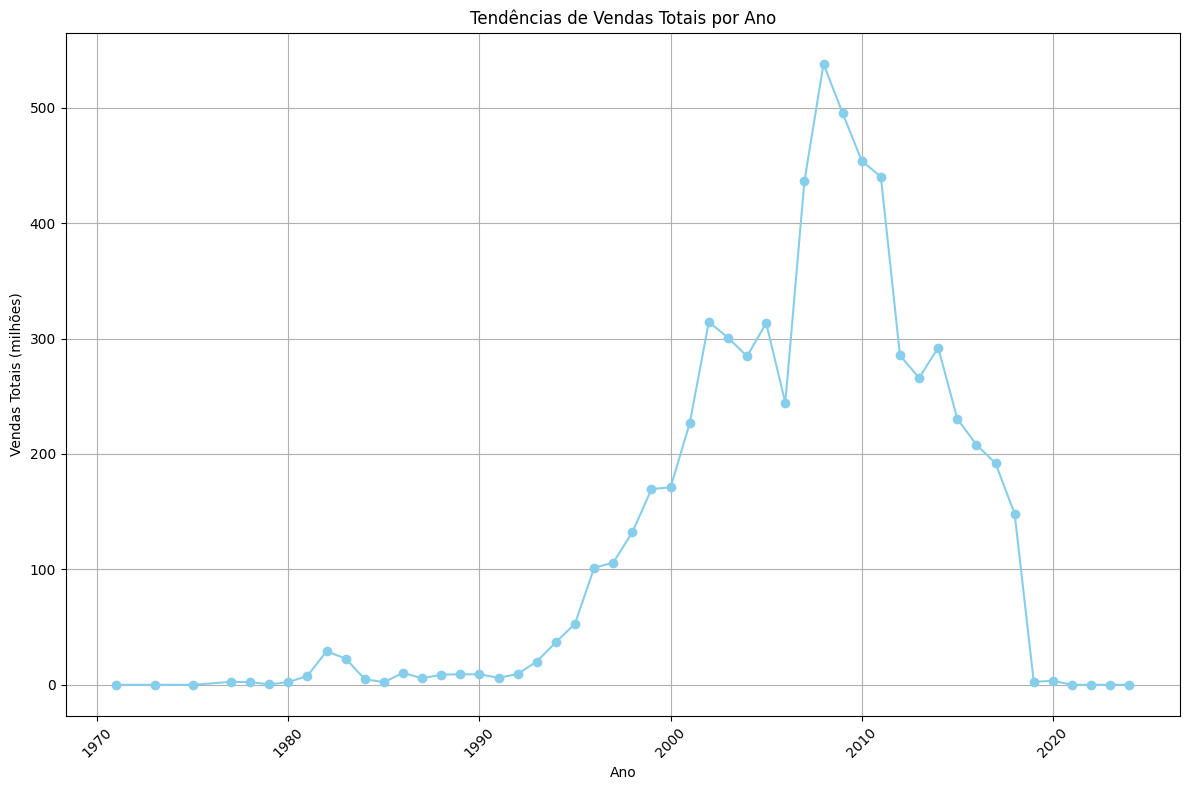

In [143]:
# Remover linhas com valores ausentes na coluna 'total_sales' e 'release_year'
df = df.dropna(subset=['total_sales', 'release_year'])

# Agrupar por ano e somar as vendas totais
annual_sales = df.groupby('release_year')['total_sales'].sum()

# Criar o gráfico de linhas para vendas anuais
plt.figure(figsize=(12, 8))
plt.plot(annual_sales.index, annual_sales.values, marker='o', color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.title('Tendências de Vendas Totais por Ano')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

plt.show()


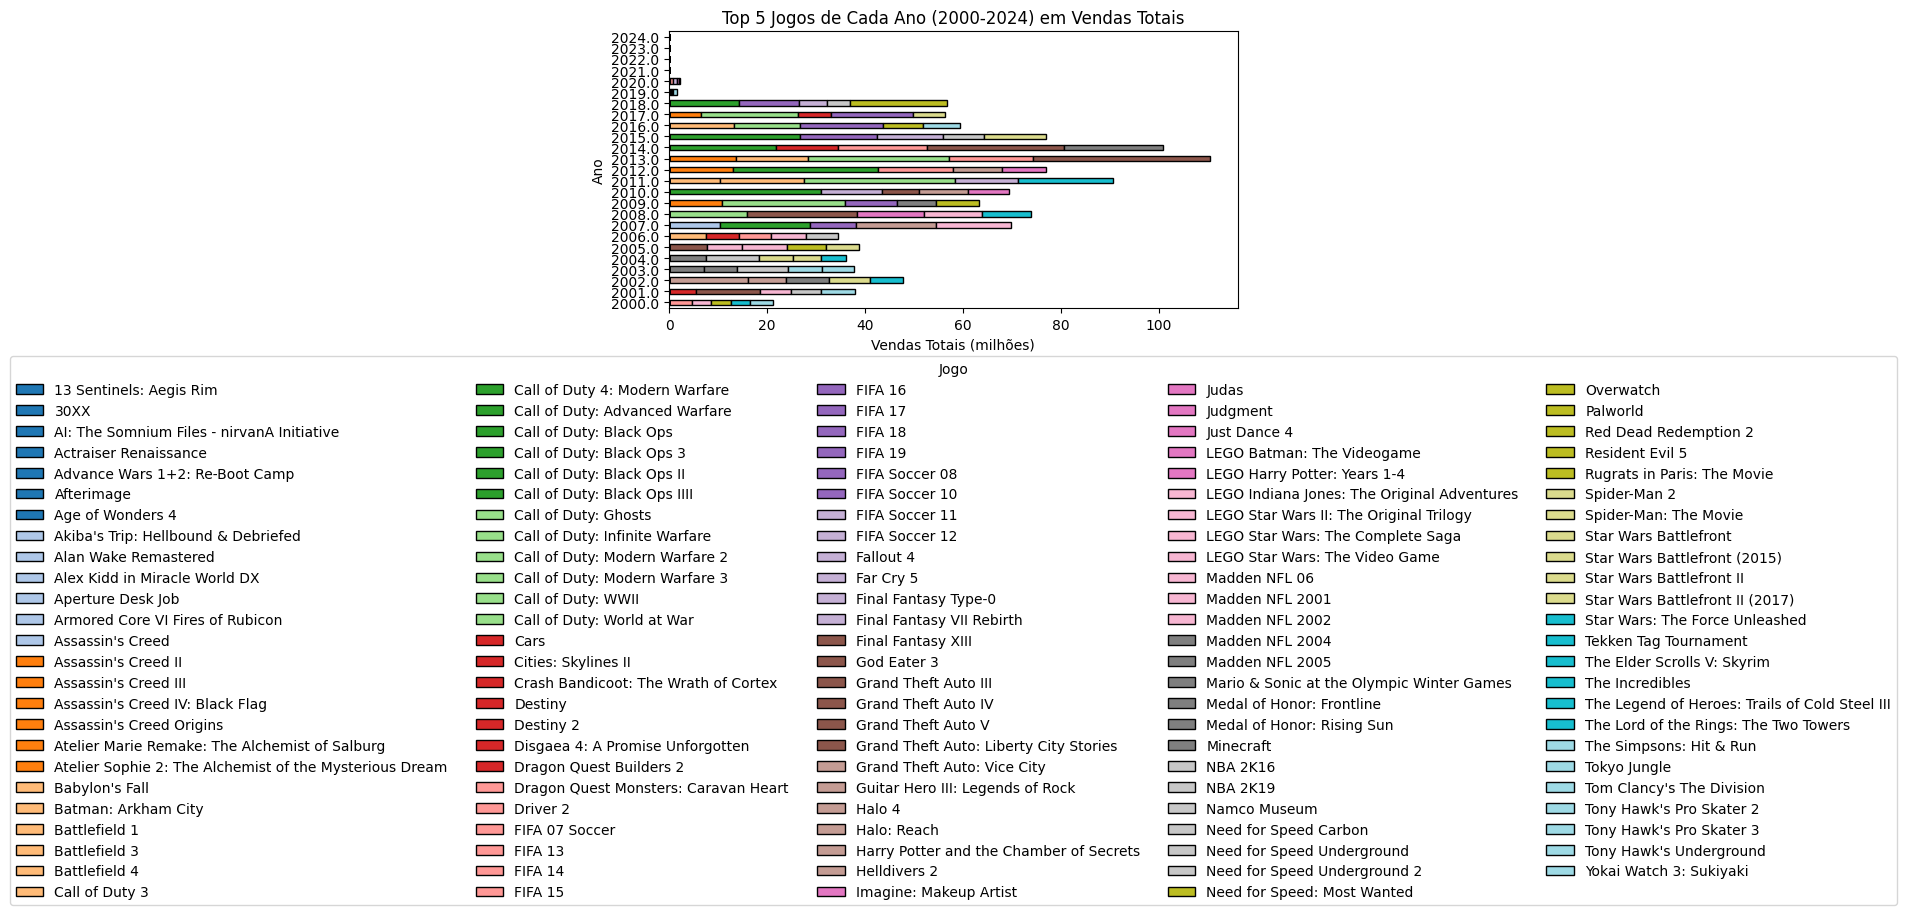

In [160]:
# Filtrar para anos entre 2000 e 2024
df_filtered = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2024)]

# Agrupar por ano e jogo e somar as vendas
annual_sales_by_game = df_filtered.groupby(['release_year', 'title'])['total_sales'].sum().unstack()

# Identificar os top 5 jogos para cada ano
top_5_games_per_year = annual_sales_by_game.apply(lambda x: x.nlargest(5), axis=1)

# Criar o gráfico para os top 5 jogos de cada ano
fig, ax = plt.subplots(figsize=(14, 10))  # Ajustar o tamanho da figura
top_5_games_per_year.plot(kind='barh', stacked=True, ax=ax, colormap='tab20', edgecolor='black')

# Ajustar os rótulos dos eixos
plt.xlabel('Vendas Totais (milhões)')
plt.ylabel('Ano')
plt.title('Top 5 Jogos de Cada Ano (2000-2024) em Vendas Totais')

# Mover a legenda para baixo
plt.legend(title='Jogo', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.show()


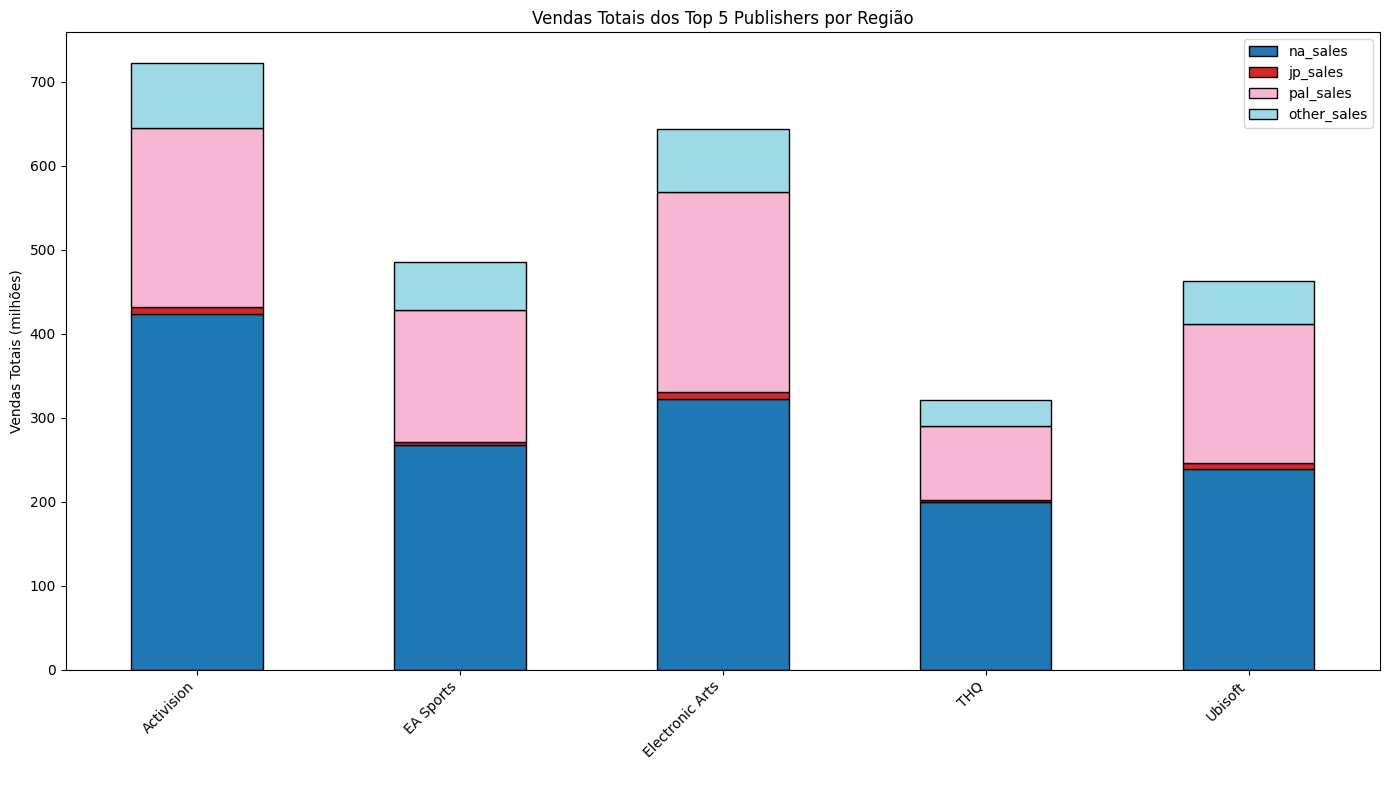

In [156]:

# Remover linhas com valores ausentes nas colunas de interesse
df = df.dropna(subset=['total_sales', 'publisher', 'console', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'])

# Identificar os 5 principais publishers
top_publishers = df.groupby('publisher')['total_sales'].sum().nlargest(5).index


# Vendas por publisher e região
sales_by_publisher_region = df_top_publishers.groupby('publisher')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Criar o gráfico para vendas por região
sales_by_publisher_region.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black', figsize=(14, 8))
plt.xlabel(' ')
plt.ylabel('Vendas Totais (milhões)')
plt.title('Vendas Totais dos Top 5 Publishers por Região')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

plt.show()
